<a href="https://colab.research.google.com/github/Englishson0909/2024spring/blob/main/RQ30625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RQ3. Are there significant differences in the collocational patterns of "very" as an adverb between written and spoken texts?

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Chi-Squared Test Results:
Chi-square statistic: 38.85575602065948, P-value: 0.0006734290545731224, Degrees of freedom: 15
Expected frequencies:
[[22.12837838  2.87162162]
 [15.0472973   1.9527027 ]
 [18.58783784  2.41216216]
 [12.39189189  1.60810811]
 [ 7.08108108  0.91891892]
 [ 5.31081081  0.68918919]
 [ 5.31081081  0.68918919]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 9.73648649  1.26351351]]


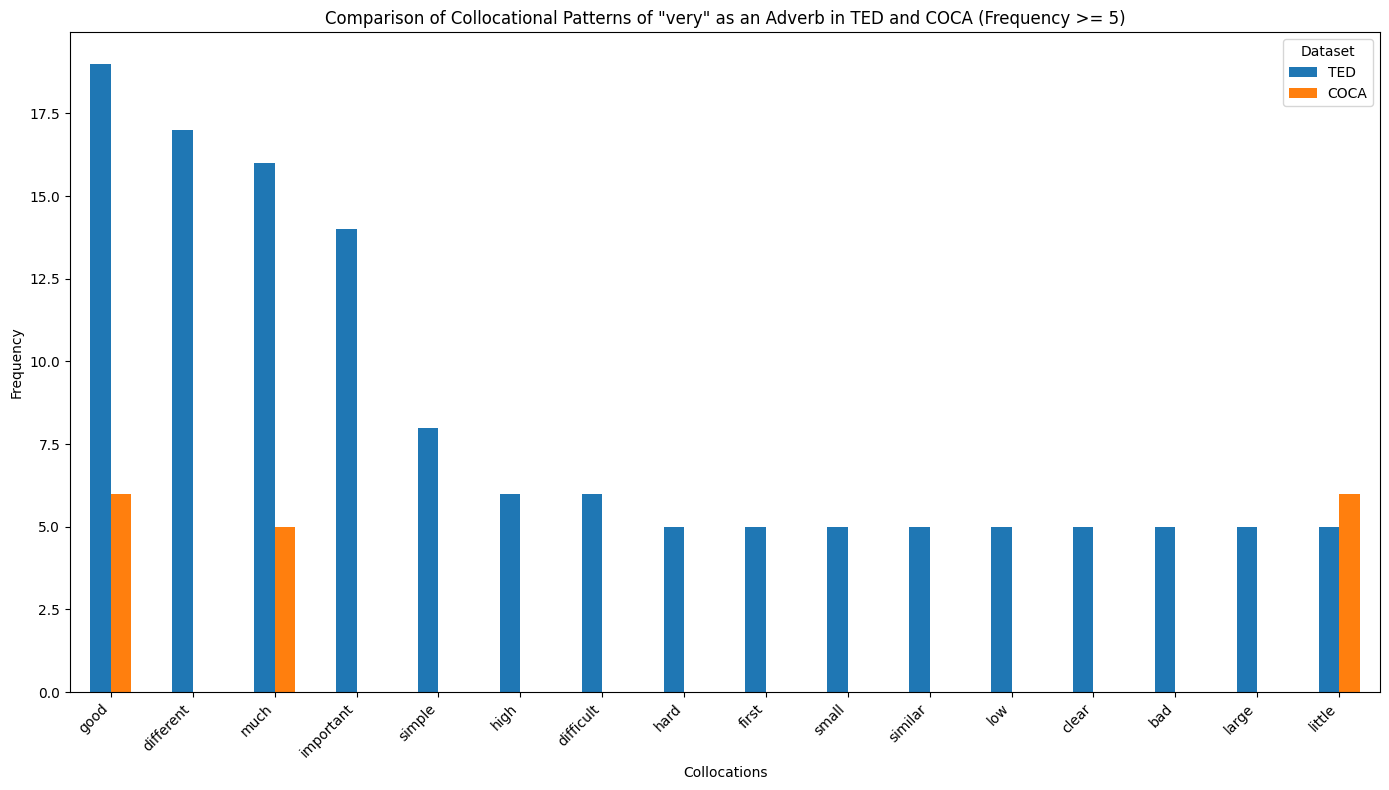

In [2]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from scipy.stats import chi2_contingency

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def download_csv(url):
    """Download a CSV file from a given URL and return it as a pandas DataFrame, with text converted to lowercase."""
    response = requests.get(url)
    if response.status_code == 200:
        csv_raw = StringIO(response.text)
        df = pd.read_csv(csv_raw)
        df = df.applymap(lambda s: s.lower() if type(s) is str else s)
        return df
    else:
        raise Exception(f"Failed to download CSV. Status code: {response.status_code}")

def get_collocations(df, word, first_tag, second_tag):
    """Get collocations of a specified word followed by a word with a specific tag in a DataFrame."""
    collocations = []
    for text in df.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        for i in range(len(tagged) - 1):
            if tagged[i][0] == word and tagged[i + 1][1] == second_tag:
                collocations.append(tagged[i + 1][0])
    return collocations

def get_frequency_distribution(collocations):
    """Get the frequency distribution of collocations."""
    return pd.Series(collocations).value_counts()

# URLs of the CSV files
ted_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/TEDcleandata.csv'
coca_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/finalcocatext.csv'

try:
    df_ted = download_csv(ted_csv_url)
    df_coca = download_csv(coca_csv_url)

    # Get collocations of "very" followed by adjectives
    ted_collocations = get_collocations(df_ted, 'very', 'RB', 'JJ')
    coca_collocations = get_collocations(df_coca, 'very', 'RB', 'JJ')

    # Get frequency distributions
    ted_freq_dist = get_frequency_distribution(ted_collocations)
    coca_freq_dist = get_frequency_distribution(coca_collocations)

    # Filter collocations with frequency >= 5
    ted_freq_dist = ted_freq_dist[ted_freq_dist >= 5]
    coca_freq_dist = coca_freq_dist[coca_freq_dist >= 5]

    # Align the frequency distributions for comparison
    combined_freq_dist = pd.concat([ted_freq_dist, coca_freq_dist], axis=1).fillna(0)
    combined_freq_dist.columns = ['TED', 'COCA']

    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(combined_freq_dist)

    # Print chi-squared test results
    print("Chi-Squared Test Results:")
    print(f"Chi-square statistic: {chi2}, P-value: {p}, Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

    # Bar plot for comparison
    combined_freq_dist.plot(kind='bar', figsize=(14, 8))
    plt.title('Comparison of Collocational Patterns of "very" as an Adverb in TED and COCA (Frequency >= 5)')
    plt.ylabel('Frequency')
    plt.xlabel('Collocations')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Chi-Squared Test Results:
Chi-square statistic: 38.85575602065948, P-value: 0.0006734290545731224, Degrees of freedom: 15
Expected frequencies:
[[22.12837838  2.87162162]
 [15.0472973   1.9527027 ]
 [18.58783784  2.41216216]
 [12.39189189  1.60810811]
 [ 7.08108108  0.91891892]
 [ 5.31081081  0.68918919]
 [ 5.31081081  0.68918919]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 4.42567568  0.57432432]
 [ 9.73648649  1.26351351]]


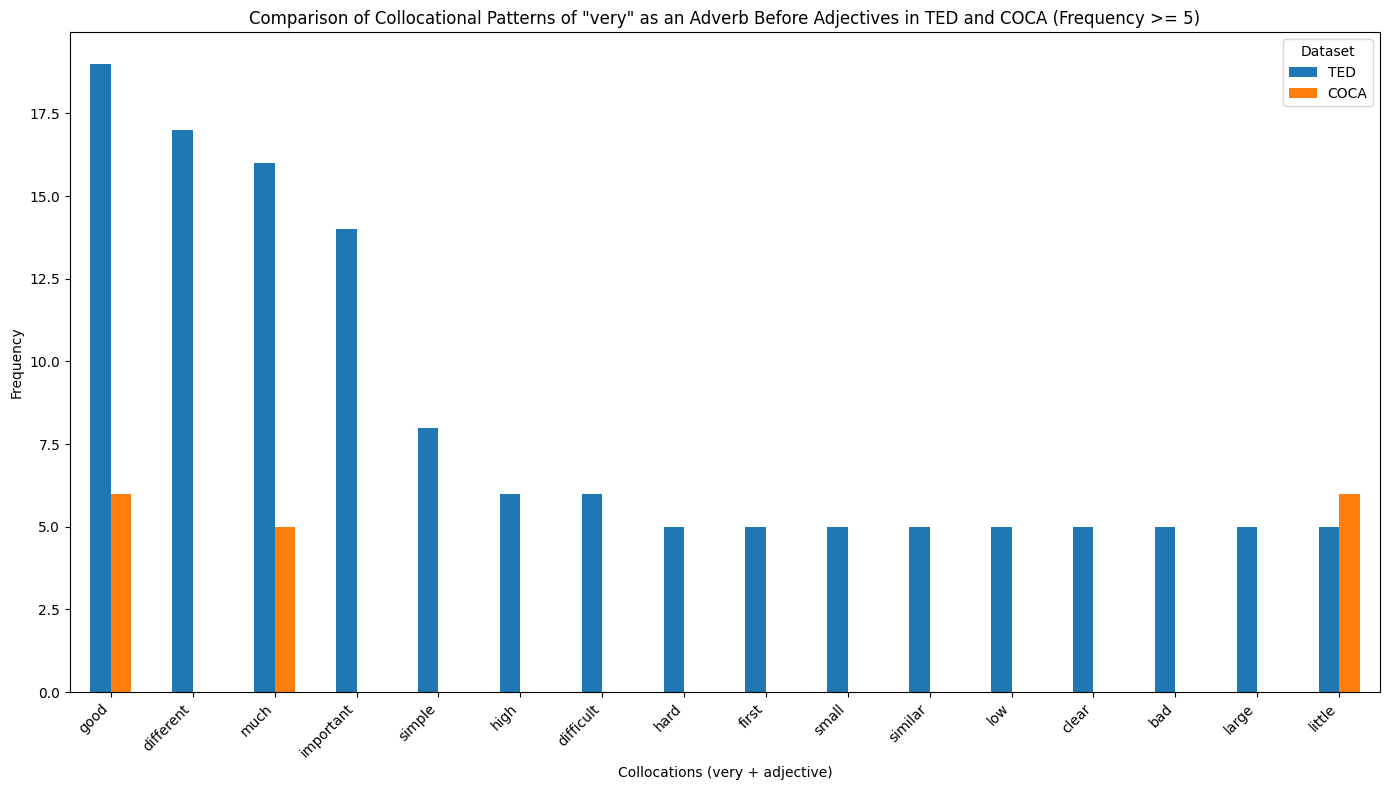

In [3]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from scipy.stats import chi2_contingency

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def download_csv(url):
    """Download a CSV file from a given URL and return it as a pandas DataFrame, with text converted to lowercase."""
    response = requests.get(url)
    if response.status_code == 200:
        csv_raw = StringIO(response.text)
        df = pd.read_csv(csv_raw)
        df = df.applymap(lambda s: s.lower() if type(s) is str else s)
        return df
    else:
        raise Exception(f"Failed to download CSV. Status code: {response.status_code}")

def get_collocations(df, word, first_tag, second_tag):
    """Get collocations of a specified word followed by a word with a specific tag in a DataFrame."""
    collocations = []
    for text in df.fillna('').astype(str).apply(lambda x: ' '.join(x), axis=1):
        tokens = word_tokenize(text)
        tagged = pos_tag(tokens)
        for i in range(len(tagged) - 1):
            if tagged[i][0] == word and tagged[i + 1][1] == second_tag:
                collocations.append(tagged[i + 1][0])
    return collocations

def get_frequency_distribution(collocations):
    """Get the frequency distribution of collocations."""
    return pd.Series(collocations).value_counts()

# URLs of the CSV files
ted_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/TEDcleandata.csv'
coca_csv_url = 'https://github.com/Englishson0909/S24Corpus-final/raw/main/finalcocatext.csv'

try:
    df_ted = download_csv(ted_csv_url)
    df_coca = download_csv(coca_csv_url)

    # Get collocations of "very" followed by adjectives
    ted_collocations = get_collocations(df_ted, 'very', 'RB', 'JJ')
    coca_collocations = get_collocations(df_coca, 'very', 'RB', 'JJ')

    # Get frequency distributions
    ted_freq_dist = get_frequency_distribution(ted_collocations)
    coca_freq_dist = get_frequency_distribution(coca_collocations)

    # Filter collocations with frequency >= 5
    ted_freq_dist = ted_freq_dist[ted_freq_dist >= 5]
    coca_freq_dist = coca_freq_dist[coca_freq_dist >= 5]

    # Align the frequency distributions for comparison
    combined_freq_dist = pd.concat([ted_freq_dist, coca_freq_dist], axis=1).fillna(0)
    combined_freq_dist.columns = ['TED', 'COCA']

    # Sort by the highest frequency
    combined_freq_dist = combined_freq_dist.sort_values(by='TED', ascending=False)

    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(combined_freq_dist)

    # Print chi-squared test results
    print("Chi-Squared Test Results:")
    print(f"Chi-square statistic: {chi2}, P-value: {p}, Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)

    # Bar plot for comparison
    combined_freq_dist.plot(kind='bar', figsize=(14, 8))
    plt.title('Comparison of Collocational Patterns of "very" as an Adverb Before Adjectives in TED and COCA (Frequency >= 5)')
    plt.ylabel('Frequency')
    plt.xlabel('Collocations (very + adjective)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Dataset')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
